# Using Keras API

In [148]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd

In [172]:
df = pd.read_csv("../data/MLProjectData.csv", header=0)

In [173]:
# need all the variables to be numeric for neural networks
df2 =pd.get_dummies(df)

In [174]:
# splitting target variabler into separate object
train_data = df2.drop('target', axis=1)
train_labels = df2['target']

In [175]:
# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=303)

### Building a Keras Model

In [176]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

### Comparing Train vs Validation Error Rates as Epochs increase

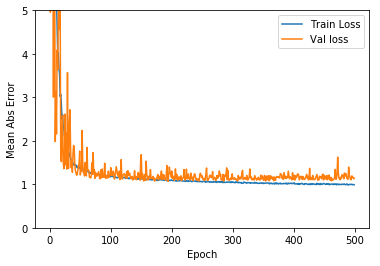

In [155]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

### Adding a short stopping parameter to reduce trainig time


............................................................................

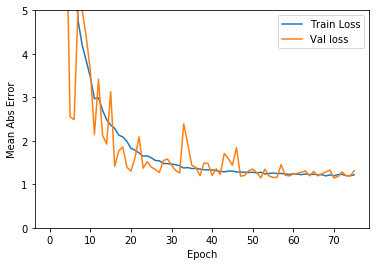

In [177]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [178]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: ", mae)

Testing set Mean Abs Error:  1.2720544856364333


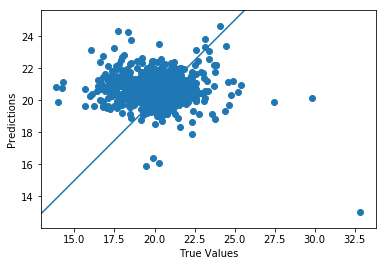

In [54]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
## Building a model based on guidelines in Introduction to Neural Nets for Java

In [57]:
input_neurons = len(X_train.columns)
print(input_neurons)

100


In [93]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 65        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

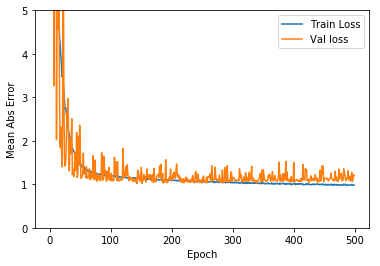

In [83]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)


....................................................................................................
.

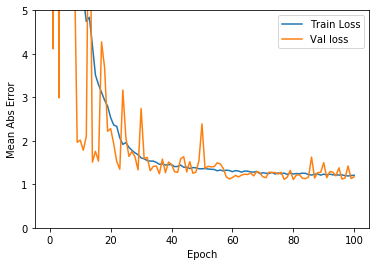

In [156]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [157]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Loss: ", loss)
print("Testing set Mean Abs Error: ", mae)

Testing set Mean Abs Error:  1.1616537017146433


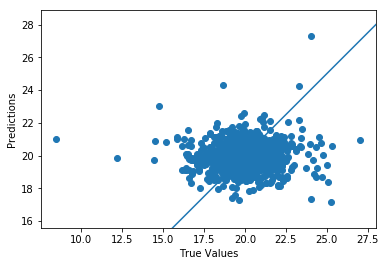

In [158]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Using TF Estimators API

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [51]:
train_data = df.drop('target', axis=1)
train_labels = df['target']

In [119]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=303)

### get a list of column names and df of continuous data

In [120]:
num_dat = X_train.select_dtypes(include=[np.number])
num_cols = num_dat.columns.tolist()

### get a list of column names and df of discrete data

In [121]:
cat_cols = [item for item in X_train.columns if item not in num_cols]

In [122]:
scaler_model = MinMaxScaler()


In [123]:
scaler_model.fit(X_train.loc[:,num_cols])

X_train_num_scaled = pd.DataFrame(scaler_model.transform(X_train.loc[:,num_cols]),columns=X_train.loc[:,num_cols].columns,index=X_train.loc[:,num_cols].index)

scaler_model.fit(X_test.loc[:,num_cols])

X_test_num_scaled = pd.DataFrame(scaler_model.transform(X_test.loc[:,num_cols]),columns=X_test.loc[:,num_cols].columns,index=X_test.loc[:,num_cols].index)

In [124]:
X_train_scaled = pd.merge(X_train_num_scaled, X_train.loc[:,cat_cols], on=[X_train_num_scaled.index, X_train_num_scaled.index])
X_train_scaled.drop(columns=['key_0', 'key_1'], axis=1, inplace=True)
len(X_train_scaled.columns)

85

In [125]:
X_test_scaled = pd.merge(X_test_num_scaled, X_test.loc[:,cat_cols], on=[X_test_num_scaled.index, X_test_num_scaled.index])
X_test_scaled.drop(columns=['key_0', 'key_1'], axis=1, inplace=True)
len(X_test_scaled.columns)

85

In [126]:
# need to drop cat1 and cat2 columns from cat_cols because they have more than 2 levels
cat_cols.remove('cat1')
cat_cols.remove('cat2')

In [127]:
X_train_final = pd.get_dummies(X_train_scaled, columns=cat_cols)
X_test_final = pd.get_dummies(X_test_scaled, columns=cat_cols)

In [128]:
df_feat_cols = num_cols + cat_cols
print(df_feat_cols)

['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21', 'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29', 'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37', 'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45', 'num46', 'num47', 'num48', 'num49', 'num50', 'num51', 'num52', 'num53', 'num54', 'num55', 'num56', 'num57', 'num58', 'num59', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26']


In [161]:
#Creating Feature Columns
feat_cols=[]
for cols in df_feat_cols:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)

In [130]:
# getting the two feature columns embedded correctly
cat1_cat_feat_col = tf.feature_column.categorical_column_with_vocabulary_list('cat1', vocabulary_list=cat1_uniq) 
cat2_cat_feat_col = tf.feature_column.categorical_column_with_vocabulary_list('cat2', vocabulary_list=cat1_uniq) 

cat1_emb_col = tf.feature_column.embedding_column(cat1_cat_feat_col, 2)
cat2_emb_col = tf.feature_column.embedding_column(cat2_cat_feat_col, 2)

In [160]:
print(feat_cols[1])
print(cat1_emb_col)

_NumericColumn(key='num2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
_EmbeddingColumn(categorical_column=_VocabularyListCategoricalColumn(key='cat1', vocabulary_list=('E', 'A', 'C', 'D', 'B'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=2, combiner='mean', layer_creator=<function embedding_column.<locals>._creator at 0x107353510>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True)


In [131]:
feat_cols.extend(['cat1_emb_col', 'cat2_emb_col'])

In [146]:
#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[64],feature_columns=feat_cols, optimizer='RMSProp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a227a1710>, '_evaluation_master': '', '_num_worker_replicas': 1, '_save_summary_steps': 100, '_task_id': 0, '_device_fn': None, '_train_distribute': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_model_dir': '/var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpprpheznk', '_save_checkpoints_secs': 600, '_is_chief': True, '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None}


In [162]:
#The estimator model
model=tf.estimator.DNNLinearCombinedRegressor(dnn_hidden_units=[64],linear_feature_columns=['cat1_emb_col', 'cat2_emb_col'], dnn_feature_columns=feat_cols, dnn_optimizer='RMSProp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a335b1ac8>, '_evaluation_master': '', '_num_worker_replicas': 1, '_save_summary_steps': 100, '_task_id': 0, '_device_fn': None, '_train_distribute': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_model_dir': '/var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpr7fbqrg0', '_save_checkpoints_secs': 600, '_is_chief': True, '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None}


In [164]:
y_train = y_train.reindex(range(0,5080),)

In [165]:
#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train_final,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [166]:
#Training the model
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Feature cat10 is not in features dictionary.

In [32]:
#Evaluating the model
train_metrics=model.evaluate(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-13-14:02:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpqnbg327p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-13-14:02:38
INFO:tensorflow:Saving dict for global step 1000: average_loss = 3.5434327, global_step = 1000, label/mean = 20.022003, loss = 35.43433, prediction/mean = 18.843674
INFO:tensorflow:Saving '

In [33]:
#Now to predict values we do the following
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
preds=model.predict(input_fn=pred_input_func)

In [34]:
predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpqnbg327p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [35]:
test_metric=model.evaluate(input_fn=pred_input_func,steps=1000)   

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-13-14:02:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpqnbg327p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Finished evaluation at 2018-11-13-14:02:53
INFO:tensorflow:Saving dict for global step 1000: average_loss = 3.0387294, global_step = 1000, label/mean = 20.100445, loss = 30.387293, prediction/mean = 19.075846
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpqnbg327p/model.ckpt-1000
